In [1]:
from fastai.vision.all import *
from bing_image_downloader import downloader
from fastai.vision.widgets import *
import os


import os
from PIL import Image


In [2]:
 #api_key = '7393b35eee3d4d7cbe621d8ad7a92d8b'

directories = ['bears/grizzly_bears','bears/black_bear','bears/polar_bears']
for sing_dir  in directories:
    paths_black_bear =  os.listdir(sing_dir)
    for i in range(len(paths_black_bear)):
        #print(i)
        image_to_be_resized = Image.open(sing_dir + "/"+ paths_black_bear[i])
        dsize = (128, 128)
        image_to_be_resized  = image_to_be_resized.resize(dsize) 
        image_to_be_resized  = image_to_be_resized.convert('RGB')
        image_to_be_resized  = image_to_be_resized.save(paths_black_bear[0])




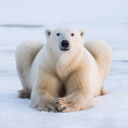

In [3]:
im = Image.open(sing_dir + "/"+ paths_black_bear[9])
im.to_thumb(128,128)

In [4]:

fns = get_image_files("bears/")
path = "bears/"
print(fns )
failed = verify_images(fns)
failed


[Path('bears/polar_bears/1340901-polar-bear-churchill.jpg'), Path('bears/polar_bears/94f6d254-e851-4079-a60a-fa9ddd6def8f.jpeg'), Path('bears/polar_bears/387489f1b8413ff360c3eead07c710621c-polar-bears.rsquare.w1200.jpg'), Path('bears/polar_bears/5e4c641b69692c00533ecf1b.jpeg'), Path('bears/polar_bears/84081_NOR20200720BEARAFP_1595259311962.jpeg'), Path('bears/polar_bears/_99180007_mediaitem99180006.jpg'), Path('bears/polar_bears/Polar_Bear_-_Alaska_(cropped).jpg'), Path('bears/polar_bears/Polar_bear_with_cubs_in_Wapusk_WW266666.jpg'), Path('bears/polar_bears/ct_110915-23.jpg'), Path('bears/polar_bears/janet-the-polar-bear-nanuk-polar-bear-lodge-george-turner-photo.jpg'), Path('bears/black_bear/GettyImages-635725340-33bbe2e.jpg'), Path('bears/black_bear/blackbear.jpg'), Path('bears/black_bear/images-2.jpeg'), Path('bears/black_bear/190606200517-formosan-black-bear-full-169.jpg'), Path('bears/black_bear/black-bear-killed-ht-jef-190619_hpMain_1x1_992.jpg'), Path('bears/black_bear/Bear-by-

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = bears.dataloaders(path)

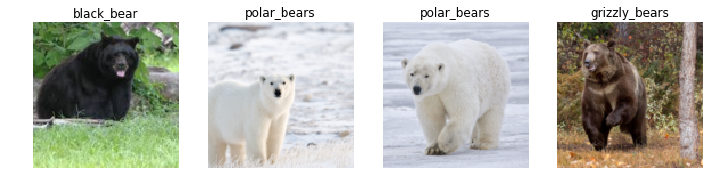

In [7]:
dls.valid.show_batch(max_n=4, nrows=1)

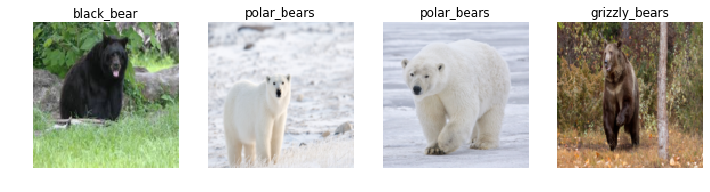

In [8]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

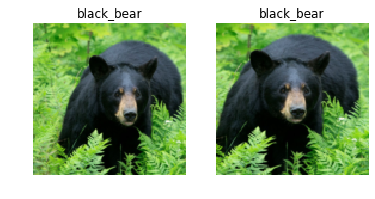

In [9]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path,bs=2)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

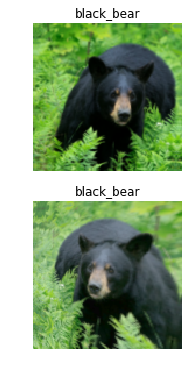

In [10]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path,bs=2)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path,bs=2)

In [12]:
print("nolıyo")

nolıyo


In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.350439,0.958652,0.500000,00:03
1,0.888559,0.793232,0.333333,00:03
2,0.918552,0.967125,0.500000,00:03
3,0.955192,0.693669,0.333333,00:04


In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

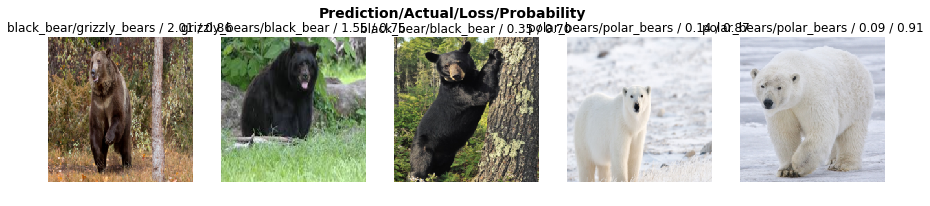

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [17]:
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('bears/grizzly_bears/3500.jpg')

In [21]:
learn_inf.dls.vocab

['black_bear', 'grizzly_bears', 'polar_bears']

In [22]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [23]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [24]:
img = PILImage.create(btn_upload.data[-1])

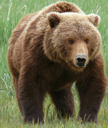

Output()

In [25]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [26]:
pred,pred_idx,probs = learn_inf.predict(img)

In [27]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
print(lbl_pred)

Label(value='Prediction: grizzly_bears; Probability: 0.6402')


In [28]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [29]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [30]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [31]:

VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [35]:
img_alt="The whole widget" width="233" src="images/att_00011.png"

SyntaxError: invalid syntax (<ipython-input-35-5a3cb921f109>, line 1)